In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
df1=pd.read_csv("calories.csv")
df2=pd.read_csv("exercise.csv")

In [4]:
df=pd.concat([df1,df2],axis=1)

In [5]:
df

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
df.shape

(15000, 10)

In [7]:
df.isnull().sum()

User_ID       0
Calories      0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [8]:
df.drop(columns=["User_ID"])

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [9]:
df.describe()

,User_ID,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [10]:
df=df.replace({"Gender":{"male":0,"female":1}})


/tmp/ipykernel_20515/2889548901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"Gender":{"male":0,"female":1}})


<Axes: xlabel='Heart_Rate', ylabel='Body_Temp'>

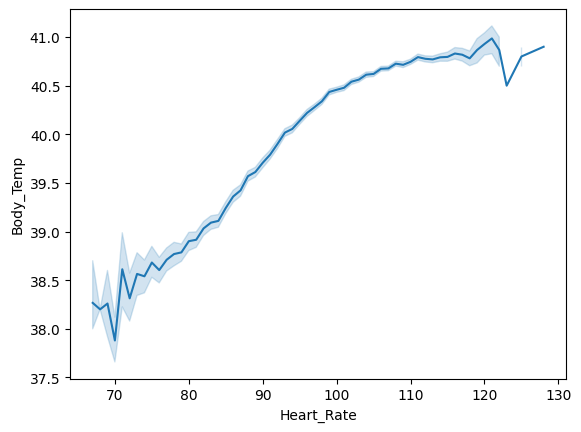

In [11]:
sns.lineplot(y="Body_Temp",x="Heart_Rate",data=df)

<Axes: xlabel='Duration', ylabel='Heart_Rate'>

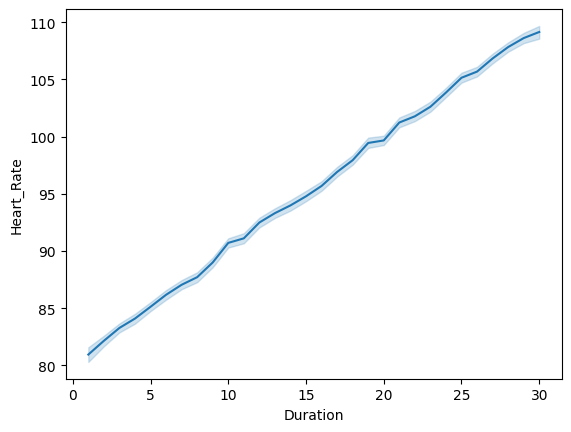

In [12]:
sns.lineplot(x="Duration",y="Heart_Rate",data=df)

<Axes: xlabel='Age', ylabel='Calories'>

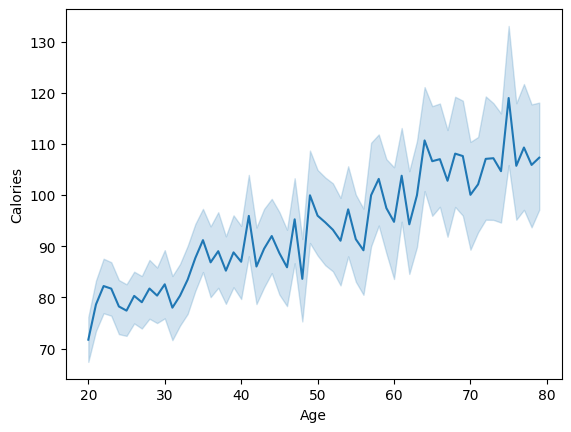

In [13]:
sns.lineplot(x="Age",y="Calories",data=df)

In [14]:
df.corr()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,-0.001661,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Calories,-0.001661,1.000000,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558
User_ID,1.000000,-0.001661,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Gender,0.000687,-0.022357,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264
Age,-0.001827,0.154395,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,0.017537,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,0.035481,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,0.955421,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,0.897882,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,0.824558,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


<Axes: >

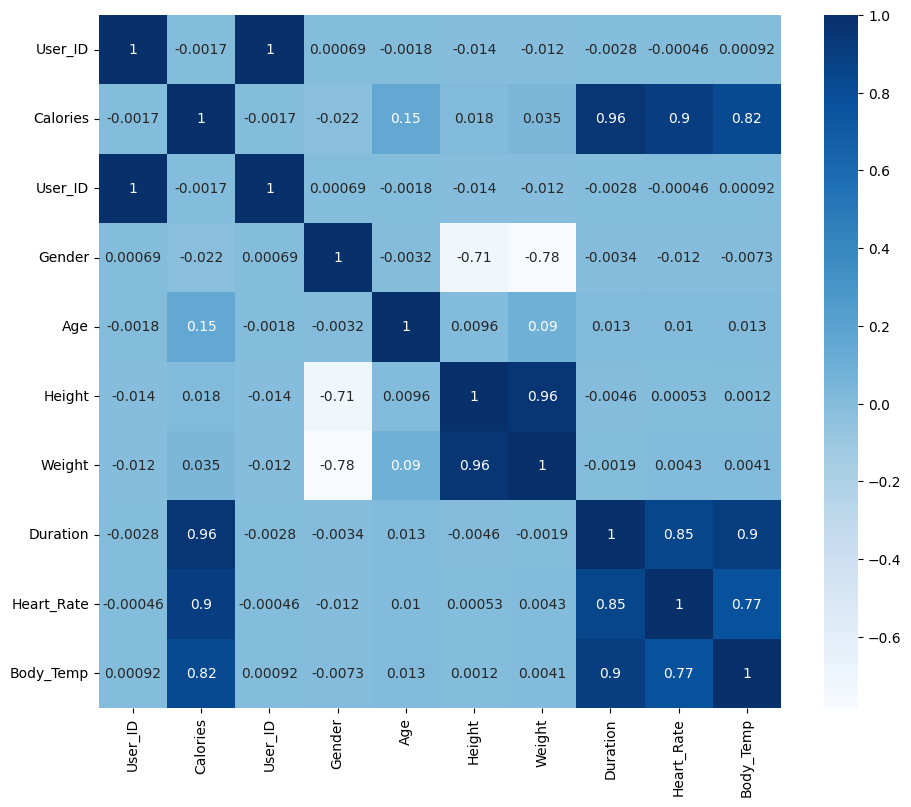

In [15]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2g')

/tmp/ipykernel_20515/2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

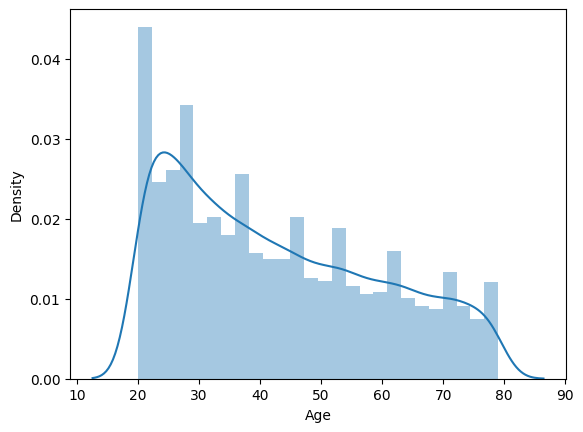

In [16]:
sns.distplot(df["Age"])

/tmp/ipykernel_20515/1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

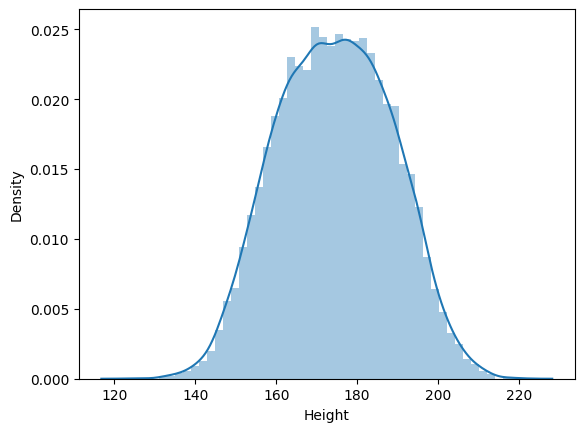

In [17]:
sns.distplot(df["Height"])

/tmp/ipykernel_20515/196129849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

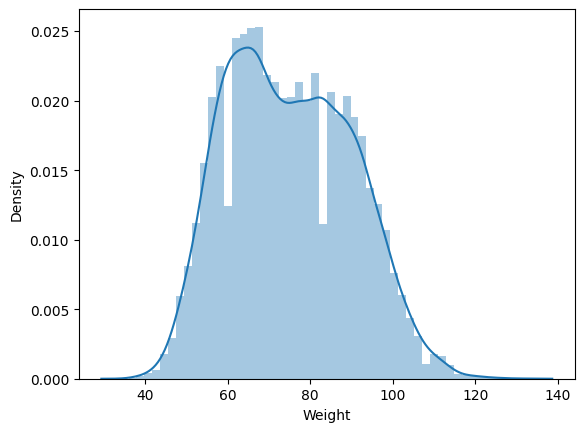

In [18]:
sns.distplot(df["Weight"])

In [24]:

x=df.drop(columns=["Calories"])
y=df["Calories"]
st=StandardScaler()
x=st.fit_transform(x)

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
dtc=DecisionTreeRegressor()
gbc=GradientBoostingRegressor(loss="squared_error",learning_rate=0.1,n_estimators=50)
rfc=RandomForestRegressor(n_estimators=100)

abc=AdaBoostRegressor(estimator=dtc,n_estimators=100)
Lr=LinearRegression()
knc=KNeighborsRegressor(n_neighbors=4)
xgb=XGBRegressor()
a={gbc:'GradientBoostingRegressor',rfc:'RandomForestRegressor',abc:'AdaBoostRegressor',Lr:'LinearRegression',knc:'KNeighborsRegressor',dtc:'DecisionTreeRegressor',xgb:"XGBRegressor"}
acc=[]
for model,name in a.items():
    model.fit(xtrain,ytrain)
    acc.append((name,r2_score(ytest,model.predict(xtest))))
acc



[('GradientBoostingRegressor', 0.9933451995083258),
 ('RandomForestRegressor', 0.9979935921833065),
 ('AdaBoostRegressor', 0.997587172994106),
 ('LinearRegression', 0.9672759152492366),
 ('KNeighborsRegressor', 0.9868921002739829),
 ('DecisionTreeRegressor', 0.9926241646773578),
 ('XGBRegressor', 0.9987901041693489)]